In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

start_time = time.time() # evaluate computational time

Download data and reindex from 1

In [2]:
# Download data
cities = pd.read_csv(r'C:\Users\Cristina\OneDrive\Documents\DSTI\Metaheuristics\Djibouti.csv', delimiter=';') 
# start index at 1
cities.index = cities.index + 1

Function to calculate Distance (will be used further)

In [3]:
def distance(p1, p2):
    '''Returns Euclidean Distance between two points'''
    x1, y1 = p1 # first city in path
    x2, y2 = p2 # second city in path
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2) # calculate distance
    if d == 0:
        d = np.inf # to add a positive number
    return d

Make a list with coordinates (here points)

In [4]:
x=cities['X']
y=cities['Y']
points = list(zip(x,y))

Vizualize the points (cities)

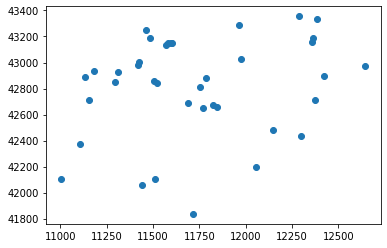

In [5]:
plt.scatter(x,y) 

Path function

In [17]:
class Path:
    def __init__(self, points): # for initialization
        self.points = points 
        self._create_path() # ordered set of points
    # Path Distance
    def __repr__(self):
        return 'Path Distance: {}'.format(round(self.distance, 3))
    # Number of path steps
    def __len__(self):
        return len(self.points)
    # return the path
    def copy(self):
        return Path(points = self.points)
    # create the path    
    def _create_path(self, return_=False):
        points = self.points.copy()
        _init = points.pop(0) # get first item as start
        p1 = tuple(_init) # make copy; it will be end as well
        path = [p1]
        d = 0 # initial distance
        for p2 in points:
            path.append(p2) # save the points
            d += distance(p1, p2) # update the distance
            p1 = p2 # update current location 
        path.append(_init) ## start == end
        d += distance(p1, _init)
        self.path = path
        self.distance = d
        
        if return_:
            return d, path # return distance and path
    
    def plot(self, i=''):
        x,y = list(zip(*self.points))
        plt.scatter(x, y, marker='x')
        a,b = list(zip(*self.path))
        plt.plot(a,b)
        plt.title('{} Distance: {}'.format(i,round(self.distance, 3)))

In [18]:
p = Path(points)
print('Initial', p)

Initial Path Distance: 16599.121


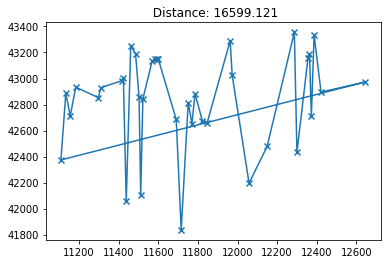

In [19]:
p.plot() # initial random potential route

## Simulated Annealing 

In [20]:
class SA:
    def __init__(self, points, T):
        self.points = random.sample(population=points, k=len(points)) ## reshuffle the cities
        self.T = T
        #self.func = func
    
    def solve(self, N=25):
        T = self.T
        path = Path(self.points)
        #plt.ion()
        iterations = np.arange(N)
        fitness = []
        best_path = path.copy()
        for it in iterations:
            points = self._rearrange(path.points.copy())
            prop = Path(points)
            hprop = prop.distance
            hcur = path.distance
            p = max(0, min(1, np.exp(-(hprop - hcur) / T)))
            if hcur > hprop: 
                p = 1
            if np.random.rand() < p:
                path = prop
            T = 0.95 * T
            fitness.append(path.distance)
            if best_path.distance > path.distance:
                best_path = path.copy()
            if it % 100 == 0 :
                plt.cla()
                path.plot('{} with p={}'.format(it, round(p,3)))
                plt.pause(0.15)
        plt.cla()
        best_path.plot()
        plt.pause(5)
        plt.cla()
        plt.plot(iterations, fitness)
        plt.xlabel('iterations')
        plt.ylabel('distance')
        plt.title('distance over time (lower is better)')
        plt.show()
        plt.pause(5)
        self.T = T
        return best_path
# Edit the path by taking a section of the path, reversing the order
# and placing it back in
   
    def _rearrange(self, points):
        stop = random.randint(1, len(points))
        start = random.randint(0, stop)
        points[start:stop] = reversed(points[start:stop])
        return points


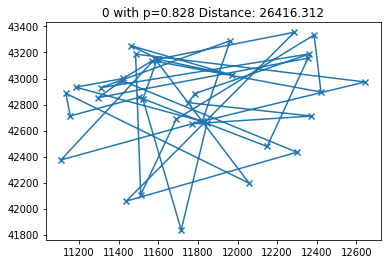

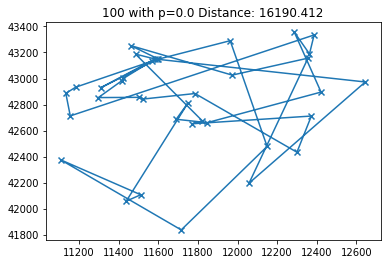

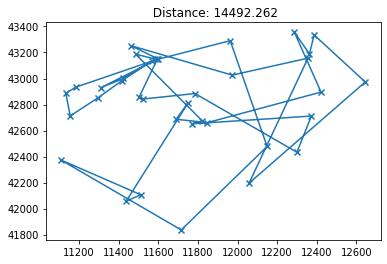

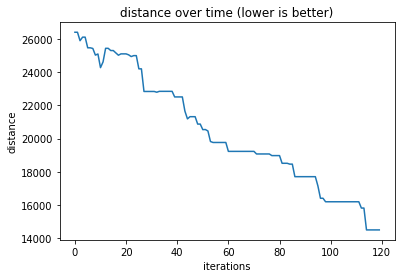

In [21]:
solver = SA(points = points, T = 1000)
solution = solver.solve(N=120)


Solution Path Distance: 19300.786 final temp 2.1
[(12421.6667, 42895.5556), (11973.0556, 43026.1111), (11963.0556, 43290.5556), (11600.0, 43150.0), (12355.8333, 43156.3889), (12363.3333, 43189.1667), (11522.2222, 42841.9444), (11297.5, 42853.3333), (11003.6111, 42102.5), (12058.3333, 42195.5556), (11503.0556, 42855.2778), (12386.6667, 43334.7222), (12372.7778, 42711.3889), (11108.6111, 42373.8889), (11511.3889, 42106.3889), (11690.5556, 42686.6667), (11770.2778, 42651.9444), (11485.5556, 43187.2222), (11751.1111, 42814.4444), (11569.4444, 43136.6667), (11461.1111, 43252.7778), (11423.8889, 43000.2778), (11416.6667, 42983.3333), (11583.3333, 43150.0), (11822.7778, 42673.6111), (11846.9444, 42660.5556), (12300.0, 42433.3333), (12149.4444, 42477.5), (11715.8333, 41836.1111), (11155.8333, 42712.5), (11133.3333, 42885.8333), (11310.2778, 42929.4444), (11183.3333, 42933.3333), (11438.3333, 42057.2222), (11595.0, 43148.0556), (11785.2778, 42884.4444), (12286.9444, 43355.5556), (12645.0, 42973

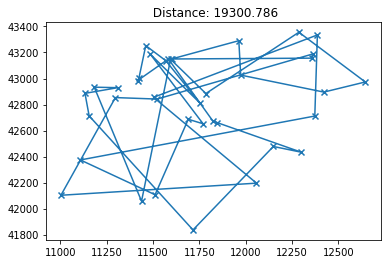

Solution found in : 54.10 seconds


In [11]:
solution.plot()
print('Solution', solution, 'final temp', round(solver.T, 1))
print(str(solution.path))
plt.show()
print("Solution found in : {:.2f} seconds".format(time.time()-start_time))  